In [13]:
import os
import grid2op
import numpy as np
from grid2op.PlotGrid import PlotMatplot

In [ ]:
env = grid2op.make("l2rpn_case14_sandbox")
obs = env.reset()

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale= 1)

ModuleNotFoundError: No module named 'seaborn'

In [19]:
help(PlotMatplot)

Help on class PlotMatplot in module grid2op.PlotGrid.PlotMatplot:

class PlotMatplot(grid2op.PlotGrid.BasePlot.BasePlot)
 |  PlotMatplot(observation_space, width=1280, height=720, grid_layout=None, dpi=96, scale=2000.0, bus_radius=6, sub_radius=15, load_radius=8, load_name=False, load_id=False, load_resolution=3, gen_radius=8, gen_name=False, gen_id=False, gen_resolution=5, storage_resolution=4, line_name=False, line_id=False)
 |  
 |  This class uses the python library "matplotlib" to draw the powergrid.
 |  
 |  Attributes
 |  ----------
 |  
 |  width: ``int``
 |      Width of the figure in pixels
 |  height: ``int``
 |      Height of the figure in pixel
 |  dpi: ``int``
 |      Dots per inch, to convert pixels dimensions into inches
 |  _scale: ``float``
 |      Scale of the drawing in arbitrary units
 |  _sub_radius: ``int``
 |      Substation circle size
 |  _sub_face_color: ``str``
 |      Substation circle fill color
 |  _sub_edge_color: ``str``
 |      Substation circle edge c

In [22]:
def plot_observation(obs, width=700, height=400, line_info="p"):
    plot_helper = PlotMatplot(env.observation_space, width=700, height=400, loc="upper right")
    fig_1 = plot_helper.plot_obs(obs, line_info='p', load_info=None, gen_info=None)
    #plt.legend(labels={}, frameon=False)
    #plt.title("Prediction step {} with error {:.2f}".format(step, error))
    plt.tight_layout()

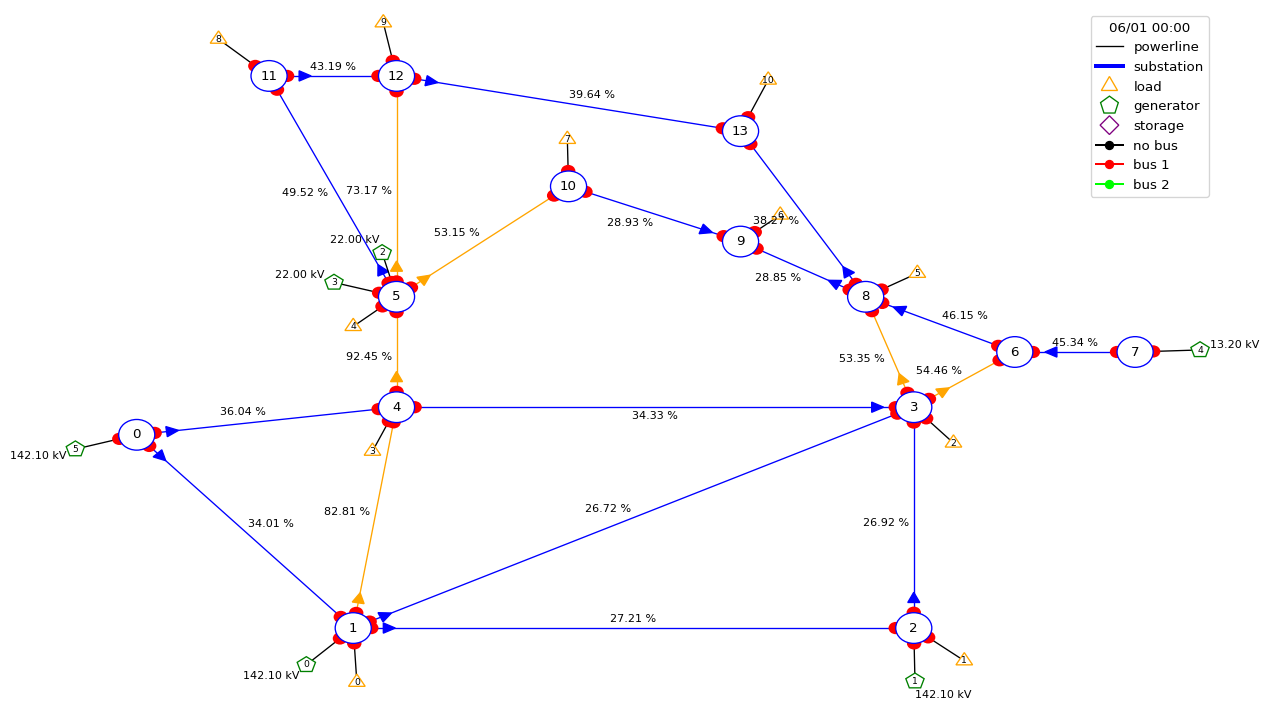

In [23]:
plot_helper = PlotMatplot(env.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  # i don't plot anything concerning the load
                                  gen_info="v"  # i draw the voltage setpoint of the generators
                                  )

In [2]:
import sys
sys.path

['/home/milad/PythonScripts/repos/Github/LIPS/getting_started',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/milad/environments/lips/lib/python3.8/site-packages',
 '/home/milad/PythonScripts/repos/Github/LIPS']

In [3]:
os.path.abspath(os.path.curdir)

'/home/milad/PythonScripts/repos/Github/LIPS/getting_started'

In [7]:
class Evaluation(object):
    def __init__(self, benchmark, obs, pred):
        self.obs = obs
        self.pred = pred
        self.benchmark = benchmark
    def print_res(self):
        print(self.pred)
        
class Benchmark(object):
    def __init__(self, obs, pred):
        self.obs = obs
        self.pred = pred
        self.evaluation = Evaluation(self, obs, pred)
    
    def print_obs(self):
        print(self.evaluation.obs)
        

In [8]:
import numpy as np
obs = np.array([[1, 2, 3], [4, 5, 6]])
pred = np.array([[2,3,4], [5,6,7]])

In [10]:
benchmark = Benchmark(obs, pred)

In [11]:
benchmark.print_obs()

[[1 2 3]
 [4 5 6]]


In [16]:
benchmark.evaluation.benchmark.obs

array([[1, 2, 3],
       [4, 5, 6]])

# Verify the time complexity of physical solver

In [4]:
env = grid2op.make("l2rpn_case14_sandbox")

In [5]:
obs = env.reset()
env.step(env.action_space({}))

(<grid2op.Space.GridObjects.CompleteObservation_l2rpn_case14_sandbox at 0x7f250f0096a0>,
 779.8489,
 False,
 {'disc_lines': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1], dtype=int32),
  'is_illegal': False,
  'is_ambiguous': False,
  'is_dispatching_illegal': False,
  'is_illegal_reco': False,
  'reason_alarm_illegal': None,
  'opponent_attack_line': None,
  'opponent_attack_sub': None,
  'opponent_attack_duration': 0,
  'exception': [],
  'rewards': {}})

In [114]:
env.step(env.action_space({}))

(<grid2op.Space.GridObjects.CompleteObservation_l2rpn_case14_sandbox at 0x7f959c12b340>,
 812.7378,
 False,
 {'disc_lines': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1], dtype=int32),
  'is_illegal': False,
  'is_ambiguous': False,
  'is_dispatching_illegal': False,
  'is_illegal_reco': False,
  'reason_alarm_illegal': None,
  'opponent_attack_line': None,
  'opponent_attack_sub': None,
  'opponent_attack_duration': 0,
  'exception': [],
  'rewards': {}})

In [104]:
env._time_powerflow

0.00798620000568917

In [105]:
env._time_step

0.04240649999701418

In [116]:
env._time_extract_obs

0.019249400014814455

In [102]:
prev = env.backend.comp_time
prev

0.00039630000000000004

In [115]:
prev = env.backend.comp_time
prev

0.0012403999999999998

In [140]:
grid2op.__version__

'1.6.5'

## Getting the topo_vect 

In [7]:
obs.topo_vect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
obs.sub_topology(sub_id=0)

array([1, 1, 1], dtype=int32)

In [13]:
obs.sub_info

array([3, 6, 4, 6, 5, 7, 3, 2, 5, 3, 3, 3, 4, 3], dtype=int32)

# Benchmark1  and Benchmark2 utils

In [16]:
# for reference
REF_ACTION = [# sub_5_id1
              {"set_bus": {"loads_id": [(4, 2)], "generators_id": [(2, 2)], "lines_or_id": [(9, 2), (8, 2)]}},
              # sub_4_id1
              {"set_bus": {"loads_id": [(3, 2)], "lines_or_id": [(17, 2)], "lines_ex_id": [(6, 2)]}},
              {"set_bus": {"lines_or_id": [(17, 2)], "lines_ex_id": [(4, 2)]}},  # sub_4_id2
              {"set_bus": {"lines_or_id": [(15, 2)], "lines_ex_id": [(3, 2)]}},  # "sub3_id1"
              {"set_bus": {"lines_or_id": [(16, 2)], "lines_ex_id": [(3, 2)]}},  # "sub3_id2"
              {"set_bus": {"lines_or_id": [(6, 2), (16, 2)]}},  # "sub3_id3"
              {"set_bus": {"lines_or_id": [(15, 2)], "lines_ex_id": [(3, 2)], "loads_id": [(2, 2)]}},  # "sub3_id4"
              # "sub8_id1"
              {"set_bus": {"lines_or_id": [(10, 2), (19, 2)], "loads_id": [(5, 2)]}},
              # "sub8_id2"
              {"set_bus": {"lines_or_id": [(10, 2), (19, 2)]}},
              # "sub8_id3"
              {"set_bus": {"lines_or_id": [(10, 2)], "loads_id": [(5, 2)]}},
              {"set_bus": {"lines_or_id": [(4, 2), (2, 2)]}},  # "sub1_id1" \n",
              {"set_bus": {"lines_or_id": [(3, 2)], "generators_id": [(0, 2)]}},  # "sub1_id2"
              {"set_line_status": [(14, -1)]},  # "powerline_9_10"
              {"set_line_status": [(12, -1)]},  # "powerline_12_13"
              {"set_line_status": [(3, -1)]},  # "powerline_1_3"
              # composed action sub_5_id1 + sub_4_id1
              {"set_bus": {"loads_id": [(4, 2), (3, 2)],
                           "generators_id": [(2, 2)],
                           "lines_or_id": [(9, 2), (8, 2), (17, 2)],
                           "lines_ex_id": [(6, 2)]}},
              # composed action sub_5_id1 + sub8_id1
              {"set_bus": {"loads_id": [(4, 2), (5, 2)],
                           "generators_id": [(2, 2)],
                           "lines_or_id": [(9, 2), (8, 2), (10, 2), (19, 2)],
                           "lines_ex_id": []}},
              # composed action sub_4_id1 + sub8_id1
              {"set_bus": {"loads_id": [(3, 2), (5, 2)],
                           "lines_or_id": [(17, 2), (10, 2), (19, 2)],
                           "lines_ex_id": [(6, 2)]}},
              # composed action sub_1_id1 + sub_3_id4
              {"set_bus": {"loads_id": [(2, 2)],
                           "lines_or_id": [(15, 2), (4, 2), (2, 2)],
                           "lines_ex_id": [(3, 2)]}},
              ]

In [195]:
def _aux_act_scenario(env) -> tuple:
    """Auxiliary function to prepare required actions to take

    Parameters
    ----------
    env : ``grid2op.Environment``
        the environment on which actions should be taken

    Returns
    -------
    tuple
        list of topological action and list of N-1 actions
    """
    li_ref_topo_origin = [REF_ACTION[1], REF_ACTION[7], REF_ACTION[-1], REF_ACTION[14]]
    li_act_n1 = [{"set_line_status": [(l_id, -1)]} for l_id in range(env.n_line)]
    li_ref_topo = [env.action_space(el) for el in li_ref_topo_origin]
    li_act_n1 = [env.action_space(el) for el in li_act_n1]
    return li_ref_topo_origin, li_ref_topo, li_act_n1

In [24]:
env.name

'l2rpn_case14_sandbox'

In [196]:
li_ref_topo_origin, li_ref_topo, li_act_n1 = _aux_act_scenario(env)

In [197]:
li_ref_topo_origin

[{'set_bus': {'loads_id': [(3, 2)],
   'lines_or_id': [(17, 2)],
   'lines_ex_id': [(6, 2)]}},
 {'set_bus': {'lines_or_id': [(10, 2), (19, 2)], 'loads_id': [(5, 2)]}},
 {'set_bus': {'loads_id': [(2, 2)],
   'lines_or_id': [(15, 2), (4, 2), (2, 2)],
   'lines_ex_id': [(3, 2)]}},
 {'set_line_status': [(3, -1)]}]

In [192]:
for act in li_ref_topo:
    print(act)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 6 [on substation 4]
	 	 - Assign bus 2 to line (origin) id 17 [on substation 4]
	 	 - Assign bus 2 to load id 3 [on substation 4]
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (origin) id 10 [on substation 8]
	 	 - Assign bus 2 to line (origin) id 19 [on substation 8]
	 	 - Assign bus 2 to load id 5 [on substation 8]
This action will:
	 - NOT ch

In [144]:
for act in li_act_n1:
    print(act)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([0])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([1])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([2])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
T

In [57]:
[(f"line:{np.where(act.get_topological_impact()[0])[0]}", np.where(act.get_topological_impact()[1])[0]) for act in li_ref_topo]

[('line:[]', array([4])),
 ('line:[]', array([8])),
 ('line:[]', array([1, 3])),
 ('line:[3]', array([], dtype=int64))]

In [60]:
[np.where(act.get_topological_impact()[0])[0] for act in li_act_n1]

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([8]),
 array([9]),
 array([10]),
 array([11]),
 array([12]),
 array([13]),
 array([14]),
 array([15]),
 array([16]),
 array([17]),
 array([18]),
 array([19])]

agents

In [12]:
from lips.benchmark.utils.powergrid_utils import get_kwargs_simulator_scenario
from lips.benchmark.utils.actor_utils import *
from lips.config import ConfigManager
from grid2op import Agent

ModuleNotFoundError: No module named 'lips.benchmark.utils'

In [73]:
config = ConfigManager()
env_kwargs = get_kwargs_simulator_scenario(config)
env = grid2op.make(**env_kwargs)
env.deactivate_forecast()

/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_trafo.py:33: UserWarning: There were some Nan in the pp_net.trafo["tap_neutral"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_neutral\"], they have been replaced by 0")
/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_trafo.py:41: UserWarning: There were some Nan in the pp_net.trafo["tap_step_percent"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_step_percent\"], they have been replaced by 0")
/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_trafo.py:46: UserWarning: There were some Nan in the pp_net.trafo["tap_pos"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_pos\"], they have been replaced by 0")
/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gr

In [74]:
def get_actor_training_scenario(env) -> Agent:
    """Gets actor for training scenario

    Parameters
    ----------
    simulator : PhysicalSimulator
        The simulator instance

    Returns
    -------
    ``grid2op.Agent``
        the agent which acts on the environment

    Todo
    ----
    TODO : simulator could be replaced by config
    """
    env = env
    li_ref_topo, li_act_n1 = _aux_act_scenario(env)
    agent = ChangeTopoRefN1Ref(env.action_space,
                               p=0.5,
                               ref_topo=li_ref_topo,
                               list_act=li_act_n1)
    return agent


def get_actor_test_scenario(simulator) -> Agent:
    """Get actor for test scenario

    Parameters
    ----------
    simulator : PhysicalSimulator
        The simulator instance

    Returns
    -------
    ``grid2op.Agent``
        the agent which acts on the environment
    """
    env = simulator._simulator
    li_ref_topo, li_act_n1 = _aux_act_scenario(env)
    agent = ChangeTopoRefN1(env.action_space,
                            ref_topo=li_ref_topo,
                            list_act=li_act_n1)
    return agent


def get_actor_test_ood_topo_scenario(simulator) -> Agent:
    """Get actor for test ood scenario

    Parameters
    ----------
    simulator : PhysicalSimulator
        The simulator instance

    Returns
    -------
    ``grid2op.Agent``
        the agent which acts on the environment
    """
    env = simulator._simulator
    li_ref_topo, li_act_n1 = _aux_act_scenario(env)
    agent = ChangeTopoRefN2(env.action_space,
                            ref_topo=li_ref_topo,
                            list_act=li_act_n1)
    return agent

In [75]:
training_agent = get_actor_training_scenario(env)

/home/milad/environments/lips/lib/python3.8/site-packages/leap_net/agents/randomAct1.py:102: UserWarning: For now RandomAct1 (and especially RandomAct2) only works when provided actions act each on at most one substation. Please check element 2 of the provided action
  warnings.warn(f"For now RandomAct1 (and especially RandomAct2) only works when provided actions "


In [137]:
obs = env.reset()
act = training_agent.act(obs, None)
print(f"line:{np.where(act.get_topological_impact()[0])[0]}", f"subs{np.where(act.get_topological_impact()[1])[0]}")
obs, *_ = env.step(act)

line:[1] subs[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


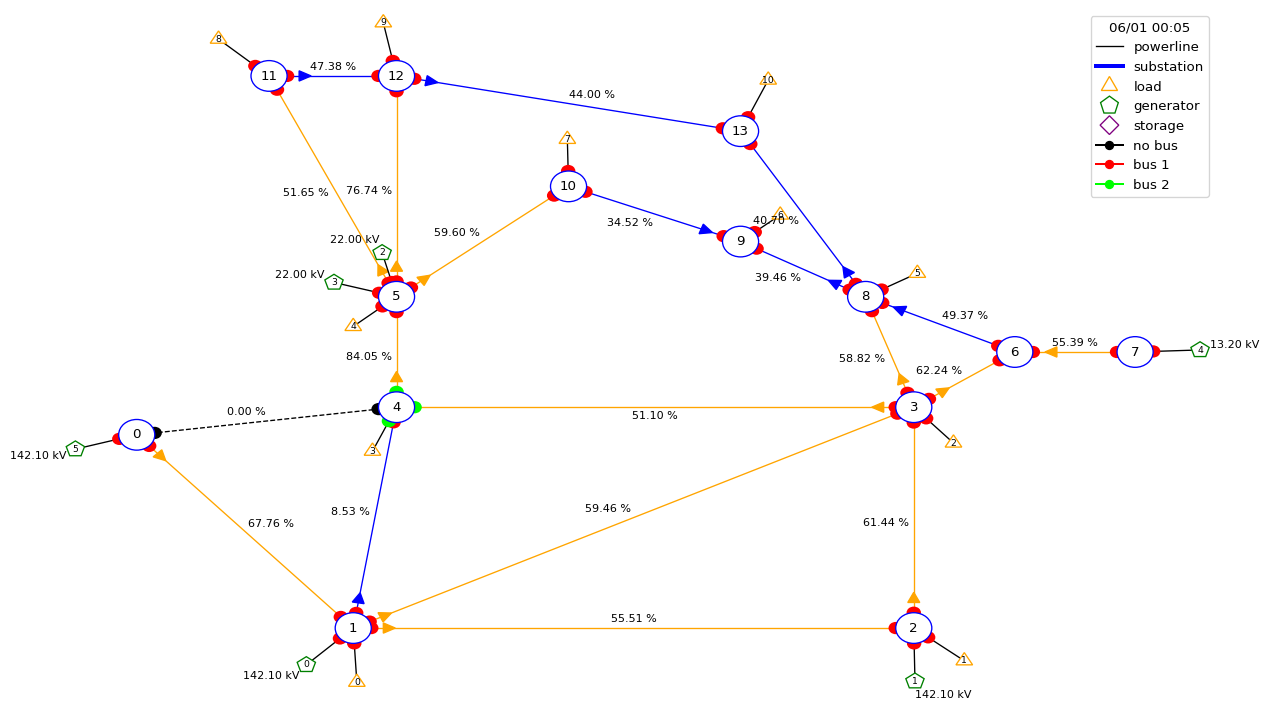

In [138]:
plot_helper = PlotMatplot(env.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  # i don't plot anything concerning the load
                                  gen_info="v"  # i draw the voltage setpoint of the generators
                                  )

In [198]:
def _aux_act_scenario(env) -> tuple:
    """Auxiliary function to prepare required actions to take

    It returns singular topo actions (acting on one sub)

    Parameters
    ----------
    env : ``grid2op.Environment``
        the environment on which actions should be taken

    Returns
    -------
    ``tuple``
        list of topological action and list of N-1 actions
    """
    li_ref_topo = [{"set_line_status": [(l_id, -1)]} for l_id in range(env.n_line)]
    li_act_n1_origin = [REF_ACTION[0], REF_ACTION[1], REF_ACTION[6], REF_ACTION[7], REF_ACTION[10]]
    li_ref_topo = [env.action_space(el) for el in li_ref_topo]
    li_act_n1 = [env.action_space(el) for el in li_act_n1_origin]
    return li_act_n1_origin, li_ref_topo, li_act_n1

In [199]:
li_act_n1_origin, li_ref_topo, li_act_n1 = _aux_act_scenario(env)

In [200]:
li_act_n1_origin

[{'set_bus': {'loads_id': [(4, 2)],
   'generators_id': [(2, 2)],
   'lines_or_id': [(9, 2), (8, 2)]}},
 {'set_bus': {'loads_id': [(3, 2)],
   'lines_or_id': [(17, 2)],
   'lines_ex_id': [(6, 2)]}},
 {'set_bus': {'lines_or_id': [(15, 2)],
   'lines_ex_id': [(3, 2)],
   'loads_id': [(2, 2)]}},
 {'set_bus': {'lines_or_id': [(10, 2), (19, 2)], 'loads_id': [(5, 2)]}},
 {'set_bus': {'lines_or_id': [(4, 2), (2, 2)]}}]

In [156]:
for action in li_act_n1:
    print(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (origin) id 8 [on substation 5]
	 	 - Assign bus 2 to line (origin) id 9 [on substation 5]
	 	 - Assign bus 2 to generator id 2 [on substation 5]
	 	 - Assign bus 2 to load id 4 [on substation 5]
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 6 [on substation 4]
	 	 - Assign bus 2 to line (origin) id 17 [on substation 4]
	 	 - Assign bus 2 to loa

In [201]:
def _aux_act_scenario_ood(env) -> tuple:
    """Auxiliary function to prepare required actions to take

    It returns composed topo actions (acting on two subs) to test the out-of-distribution

    Parameters
    ----------
    env : ``grid2op.Environment``
        the environment on which actions should be taken

    Returns
    -------
    ``tuple``
        list of topological action and list of N-1 actions
    """
    li_ref_topo = [{"set_line_status": [(l_id, -1)]} for l_id in range(env.n_line)]
    li_act_n1 = [REF_ACTION[15], REF_ACTION[16], REF_ACTION[17], REF_ACTION[18]]
    li_ref_topo = [env.action_space(el) for el in li_ref_topo]
    li_act_n1 = [env.action_space(el) for el in li_act_n1]
    return li_ref_topo, li_act_n1

In [202]:
li_ref_topo, li_act_n1 = _aux_act_scenario_ood(env)

In [203]:
for action in li_act_n1:
    print(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 6 [on substation 4]
	 	 - Assign bus 2 to line (origin) id 17 [on substation 4]
	 	 - Assign bus 2 to load id 3 [on substation 4]
	 	 - Assign bus 2 to line (origin) id 8 [on substation 5]
	 	 - Assign bus 2 to line (origin) id 9 [on substation 5]
	 	 - Assign bus 2 to generator id 2 [on substation 5]
	 	 - Assign bus 2 to load id 4 [on substation 5]
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of t

# Bigger Env

In [146]:
env_nips = grid2op.make("l2rpn_neurips_2020_track1_small")

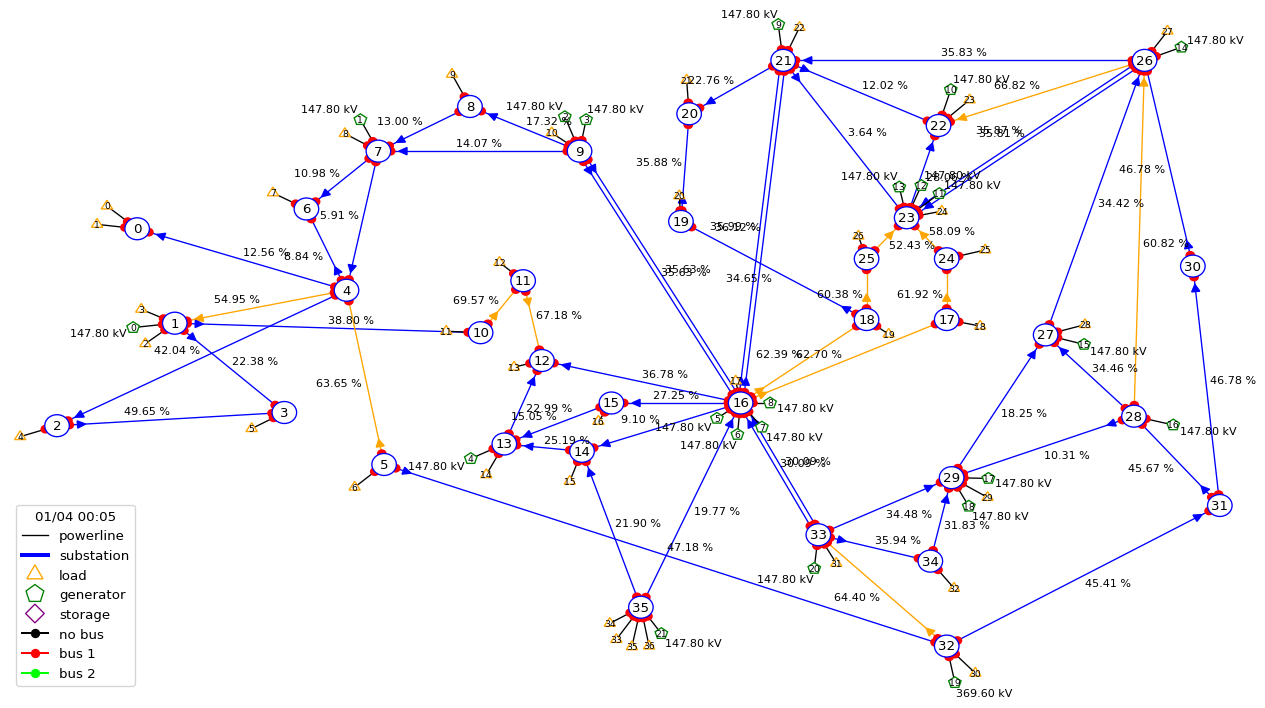

In [148]:
obs = env_nips.reset()
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

In [187]:
unit_sub_1 = {"set_bus": {"loads_id": [(2,2)], "lines_or_id": [(3, 2), (4, 2)]}}
action = env_nips.action_space(unit_sub_1)
unit_sub_2 = {"set_bus": {"generators_id": [(0,2)], "lines_or_id": [(12, 2)]}}
action1 = env_nips.action_space(unit_sub_2)
unit_sub_16_1 = {"set_bus": {"lines_ex_id": [(17,2), (21,2)], "generators_id": [(6,2)]}}
unit_sub_16_1_bis = {"set_bus": {"lines_ex_id": [(18,2), (21,2)], "generators_id": [(6,2)]}}
action2 = env_nips.action_space(unit_sub_16_1)
action2_bis = env_nips.action_space(unit_sub_16_1_bis)
unit_sub_16_2 = {"set_bus": {"lines_ex_id": [(20,2)], "loads_id": [(17,2)]}}
action3 = env_nips.action_space(unit_sub_16_2)

In [184]:
print(action2)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 17 [on substation 16]
	 	 - Assign bus 2 to line (extremity) id 21 [on substation 16]
	 	 - Assign bus 2 to generator id 6 [on substation 16]


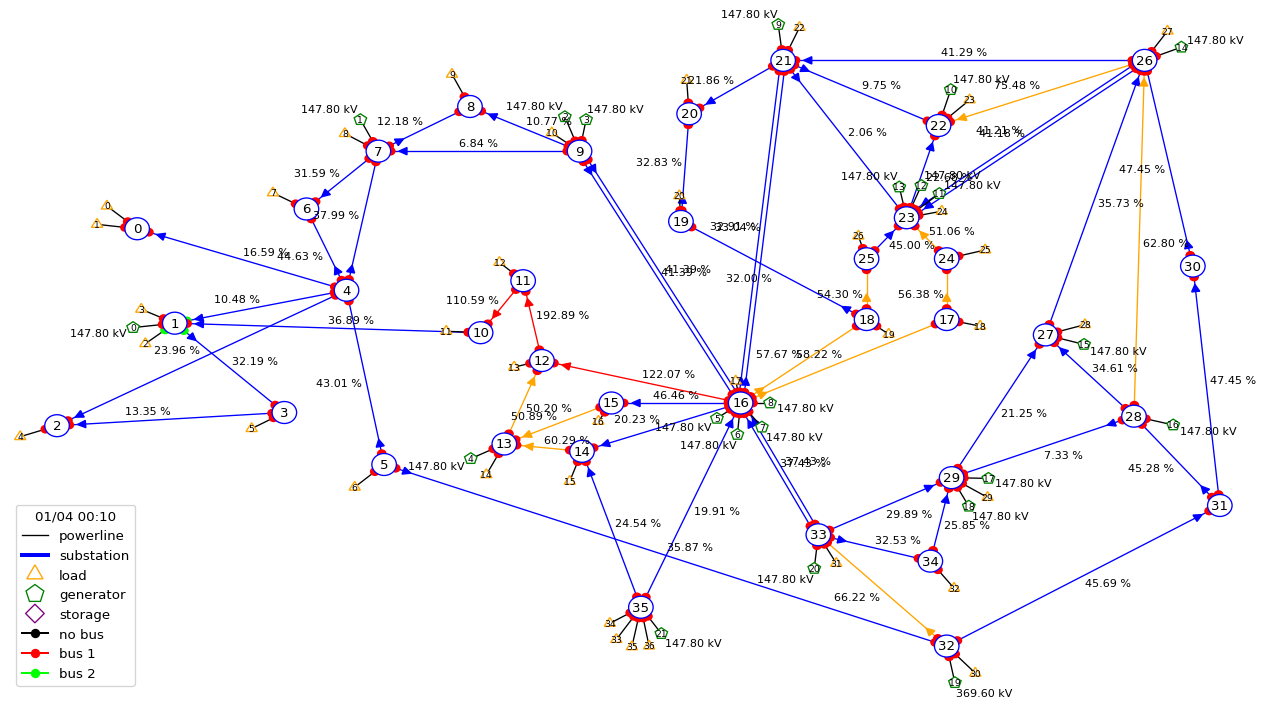

In [169]:
obs = env_nips.reset()
obs, *_ = env_nips.step(action)
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

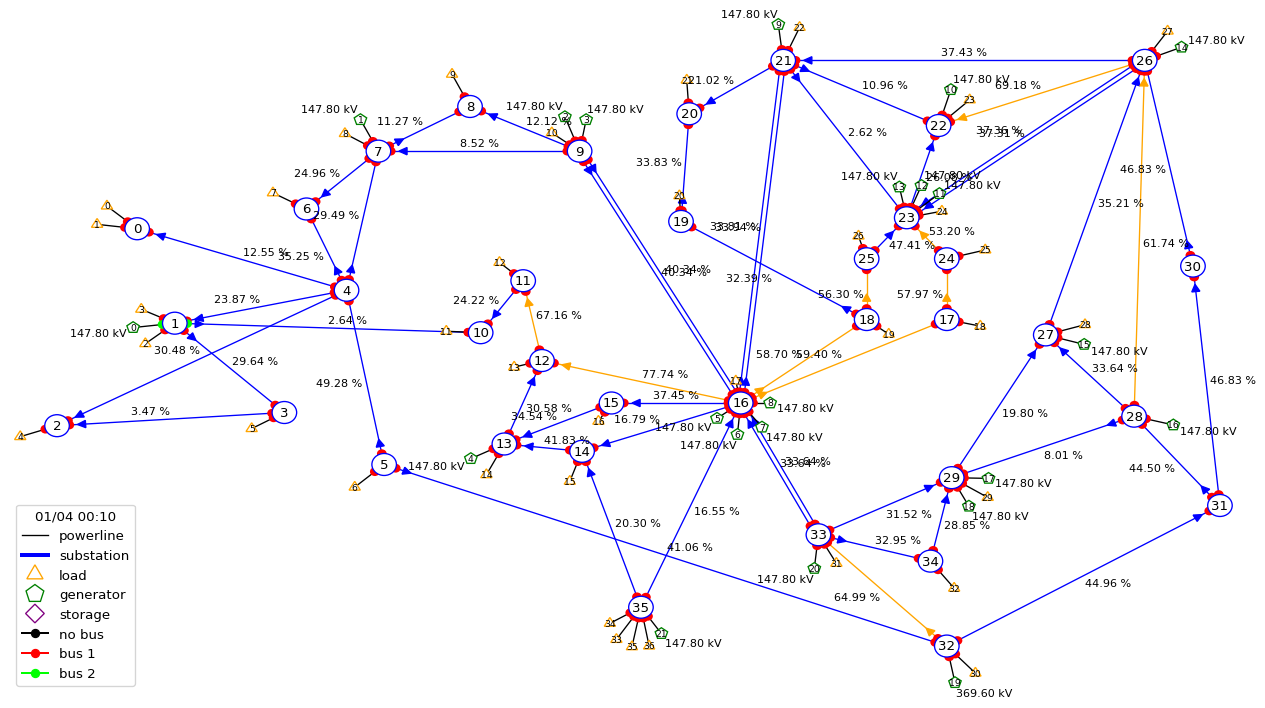

In [175]:
obs = env_nips.reset()
obs, *_ = env_nips.step(action1)
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

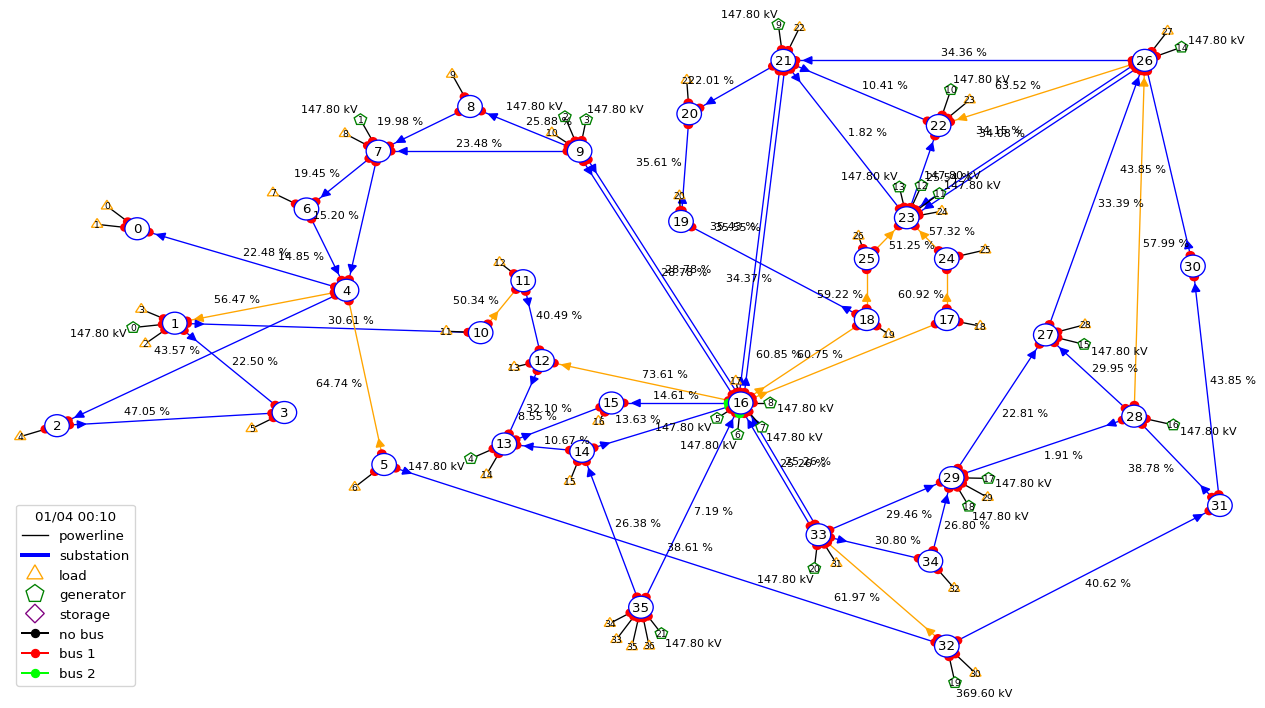

In [185]:
obs = env_nips.reset()
obs, *_ = env_nips.step(action2)
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

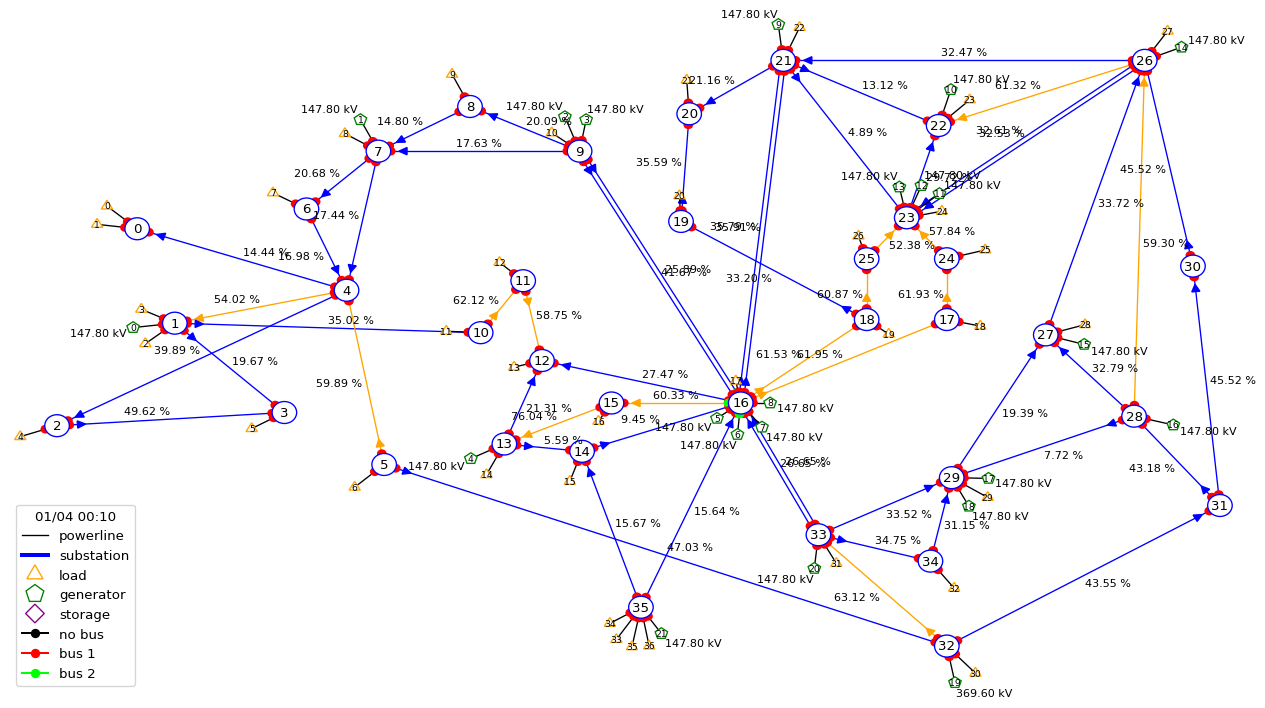

In [188]:
obs = env_nips.reset()
obs, *_ = env_nips.step(action2_bis)
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

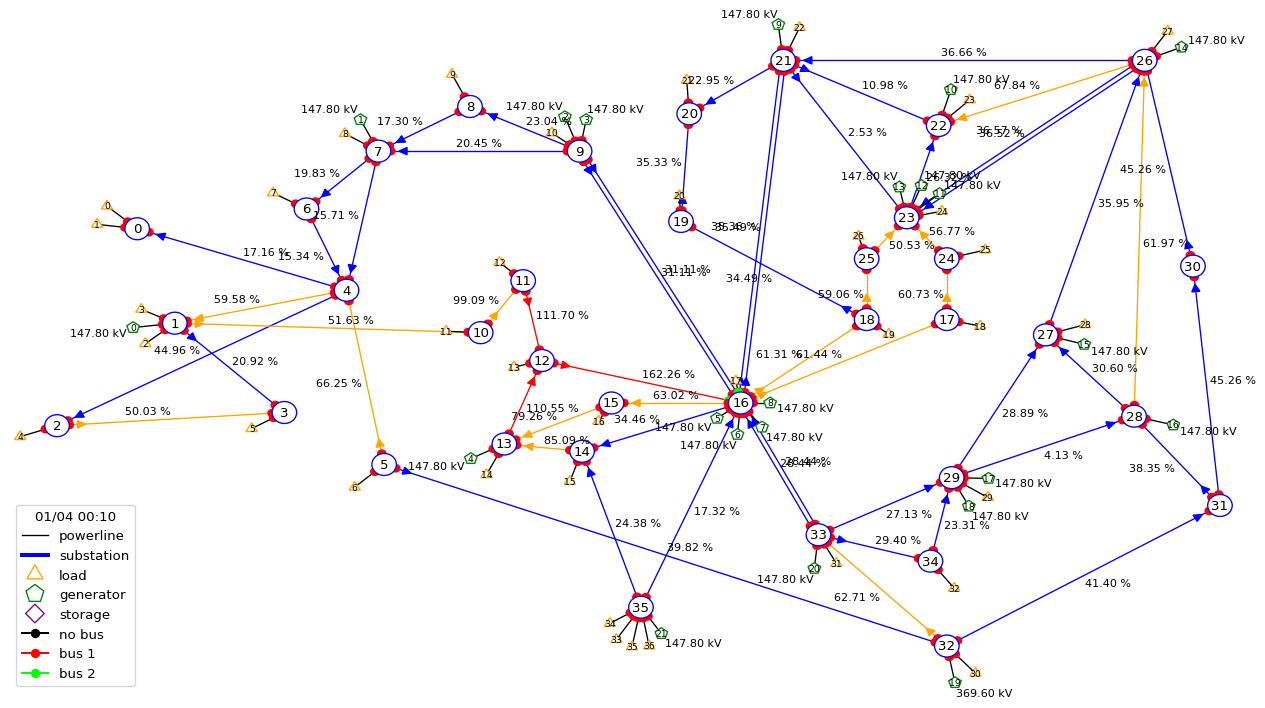

In [186]:
obs = env_nips.reset()
obs, *_ = env_nips.step(action3)
plot_helper = PlotMatplot(env_nips.observation_space)
fig_custom = plot_helper.plot_obs(obs,
                                  line_info="rho",
                                  load_info=None,  
                                  gen_info="v"
                                  )

In [173]:
print(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (origin) id 3 [on substation 1]
	 	 - Assign bus 2 to line (origin) id 4 [on substation 1]
	 	 - Assign bus 2 to load id 2 [on substation 1]


# Check the XDepthAgent

In [8]:
import grid2op
from lips.benchmark.utils.powergrid_utils import *

In [9]:
env = grid2op.make("l2rpn_case14_sandbox")

Verify the issue number #80

In [20]:
combinations_sub = compute_all_combinations(env.action_space, sub_id=7)

In [21]:
combinations_sub

array([], dtype=float64)

## Check used chronics

In [163]:
import re
import numpy as np
import grid2op
from grid2op.Chronics import FromNPY
from grid2op.Chronics import GridStateFromFile
from grid2op.Agent import DoNothingAgent
from lips.dataset.utils.powergrid_utils import get_kwargs_simulator_scenario
from lips.dataset.utils.powergrid_utils import XDepthAgent, get_action_list
from lips.config import ConfigManager

In [165]:
import pathlib
LIPS_PATH = pathlib.Path().resolve().parent
CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_neurips_2020_track1_small.ini"
config = ConfigManager(section_name="Benchmark1", path=CONFIG_PATH)

In [166]:
config.get_options_dict()

{'attr_x': ('prod_p', 'prod_v', 'load_p', 'load_q'),
 'attr_tau': ('line_status', 'topo_vect'),
 'attr_y': ('a_or', 'a_ex'),
 'dataset_create_params': {'reference_args': {'topo_actions': [{'set_bus': {'loads_id': [(2,
        2)],
      'lines_or_id': [(3, 2), (4, 2)]}},
    {'set_bus': {'generators_id': [(0, 2)], 'lines_or_id': [(12, 2)]}},
    {'set_bus': {'lines_ex_id': [(17, 2), (21, 2)],
      'generators_id': [(6, 2)]}},
    {'set_bus': {'lines_ex_id': [(20, 2)], 'loads_id': [(17, 2)]}}],
   'prob_depth': (0.5, 0.5),
   'prob_type': (1.0, 0.0),
   'prob_do_nothing': 0.2,
   'max_disc': 0},
  'train': {'prob_depth': (1.0,),
   'prob_type': (0.0, 1.0),
   'prob_do_nothing': 0.5,
   'max_disc': 1},
  'test': {'prob_depth': (1.0,),
   'prob_type': (0.0, 1.0),
   'prob_do_nothing': 0.0,
   'max_disc': 1},
  'test_ood': {'prob_depth': (0.0, 1.0),
   'prob_type': (0.0, 1.0),
   'prob_do_nothing': 0,
   'max_disc': 2}},
 'eval_dict': {'ML': ['MSE_avg', 'MAE_avg', 'mape_90_avg'],
  'Physi

#### Using my proposed method

- Sample some chronic using regular expression (for training, validation, test and OOD test)
- while the number of required observation is not reached:
    - select a chronic by random among the pre-selected chronics
    - Fast-forward or not to random time stamp
    - Generate X time stamps from the time stamp identified in last step (e.g., 3 days)

In [277]:
nb_days_per_chronic = 3 # the number of required time stamp to generate from each chronic
nb_time_stamps_per_chronic = int(nb_days_per_chronic * 24 * (60 / 5))

In [278]:
nb_time_stamps_per_chronic

864

##### Read the environment variables and make the environment

In [167]:
env_kwargs = get_kwargs_simulator_scenario(config)

In [168]:
env = grid2op.make(**env_kwargs)

/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_slack.py:113: UserWarning: We found either some slack coefficient to be < 0. or they were all 0.We set them all to 1.0 to avoid such issues
  warnings.warn("We found either some slack coefficient to be < 0. or they were all 0."


##### Load the actor for this benchmark

In [171]:
all_topo_actions = get_action_list(env.action_space)
train_actor_seed = 5
training_actor = XDepthAgent(env.action_space,
                             all_topo_actions=all_topo_actions,
                             reference_params=config.get_option("dataset_create_params").get("reference_args", None),
                             scenario_params=config.get_option("dataset_create_params")["train"],
                             seed=train_actor_seed,
                             log_path=None
                            )

##### Sample chronics based on regular expression available in config file

In [16]:
chronics_selected_regex = re.compile(config.get_option("chronics")["train"])
env.chronics_handler.set_filter(lambda path:
                                re.match(chronics_selected_regex, path) is not None)
kept = env.chronics_handler.real_data.reset()

In [48]:
print("Number of selected chronics: ", len(kept))
print(kept)

Number of selected chronics:  360
['/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_000'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_001'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_002'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_003'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_004'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_005'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_006'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_007'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_008'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_009'
 '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_010

29 chronics out of 47 per month are selected for training purpose.

##### The operations for one iteration (one observation)

In [280]:
# setting seed for reproducibility
env.chronics_handler.seed(1234)
chronics_used_id = list()
chronics_used_names = list()

In [239]:
# select a chronic by random
# print(env.chronics_handler.seed_used)
def sample_chronics():
    chronic_id = env.chronics_handler.real_data.sample_next_chronics()[0]
    chronics_used_id.append(chronic_id)
    chronics_used_names.append(env.chronics_handler.get_name())
    #print(chronic_id)
    env.set_id(chronic_id)
    obs = env.reset()

In [244]:
sample_chronics()

In [291]:
chronics_used_id

[436, 3]

In [292]:
chronics_used_names

['Scenario_november_003', 'Scenario_april_002']

In [247]:
print(env.chronics_handler.get_name())
print(env.chronics_handler.real_data.data.current_datetime)
#env.chronics_handler.real_data.data.prod_p

Scenario_january_040
2012-01-01 00:05:00


##### FastForward to a random time stamp in the selected chronic

In [281]:
env.space_prng.seed(1234)
used_timesteps = list()

In [257]:
# randomly skip a given number of steps in the first day (to improve the randomness)
def reset_simulator(nb_time_stamps_per_chronic, fast_forward=True):
    obs = env.reset()
    if fast_forward:
        #nb_ff = env.space_prng.randint(env.chronics_handler.max_episode_duration())
        remaining_timesteps = set(np.arange(env.chronics_handler.max_episode_duration()) - nb_time_stamps_per_chronic) - \
                                  set(used_timesteps)
        nb_ff = env.space_prng.choice(list(remaining_timesteps))
        print(nb_ff)
        if nb_ff > 0:
            env.fast_forward_chronics(nb_ff)
            obs = env.get_obs()
            used_timesteps.append(nb_ff)
        else:
            used_timesteps.append(0)
    reward = env.reward_range[0]
    info = {}
    
    return obs, reward, info, used_timesteps

In [ ]:
def _reset_simulator(self, ts_per_chronic: int, fast_forward: bool = True):
        self._obs = self._simulator.reset()
        # randomly skip a given number of steps in the first day (to improve the randomness)
        nb_ff = self._simulator.space_prng.randint(288)
        if nb_ff > 0:
            self._simulator.fast_forward_chronics(nb_ff)
            self._obs = self._simulator.get_obs()
        self._reward = self._simulator.reward_range[0]
        self._info = {}

In [270]:
obs, reward, info, used_timesteps = reset_simulator(nb_time_stamps_per_chronic)

6143.0


In [293]:
used_timesteps

[2863, 723]

In [272]:
print(env.chronics_handler.get_name())
print(env.chronics_handler.real_data.data.current_datetime)

Scenario_july_002
2012-07-22 08:00:00


##### generate x time steps from that point

In [282]:
# obs in the one selected in the previous fast forwarded version
init_state, init_info = obs, {}

In [283]:
nb_samples = 10000
data = {}
attr_names = config.get_option("attr_x") + config.get_option("attr_tau") + config.get_option("attr_y")
for attr_nm in attr_names:
    array_ = getattr(init_state, attr_nm)
    data[attr_nm] = np.zeros((nb_samples, array_.shape[0]), dtype=array_.dtype)

In [285]:
def modify_state(nb_time_stamps_per_chronic, obs):
    done = True
    while done:
        act = training_actor.act(obs, None, None)
        obs, reward, done, info = env.step(act)
        
        if done:
            reset_simulator(nb_time_stamps_per_chronic)
    return obs, reward, done, info

In [274]:
def store_obs(current_size, obs):
    for attr_nm in attr_names:
        array_ = getattr(obs, attr_nm)
        data[attr_nm][current_size, :] = array_

In [294]:
# to generate all the samples
ds_size = 0
#for ds_size in range(nb_samples):
sample_chronics()
reset_simulator(nb_time_stamps_per_chronic)
# for this example we generate over three days of one selected chronic
nb_steps = 0
done = False
while (nb_steps < nb_time_stamps_per_chronic) and (done is False):
    obs, reward, done, info = modify_state(nb_time_stamps_per_chronic, obs)
    store_obs(nb_steps, obs)
    nb_steps += 1
    ds_size += 1

1319


In [290]:
done

False

In [295]:
data

{'prod_p': array([[  0.      ,  16.5     ,   0.      , ..., 399.      ,   0.      ,
          46.56462 ],
        [  0.      ,  16.2     ,   0.      , ..., 399.      ,   0.      ,
          35.571987],
        [  0.      ,  16.5     ,   0.      , ..., 399.      ,   0.      ,
          66.92735 ],
        ...,
        [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ]], dtype=float32),
 'prod_v': array([[147.8    , 147.8    , 147.8    , ..., 369.59998, 147.8    ,
         147.8    ],
        [147.8    , 147.8    , 147.8    , ..., 369.6    , 147.8    ,
         147.8    ],
        [147.8    , 147.8    , 147.8    , ..., 369.59998, 147.8    ,
         147.8    ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
 

#### Using FromNPY

In [375]:
begin_time = 20
end_time = 21
env_ref = grid2op.make(**get_kwargs_simulator_scenario(config))
chronics_selected_regex = re.compile(config.get_option("chronics").get("train"))
env_ref.chronics_handler.set_filter(lambda path:
                                    re.match(chronics_selected_regex, path) is not None)
env_ref.chronics_handler.real_data.reset()

load_p = 1.0 * env_ref.chronics_handler.real_data.data.load_p
load_q = 1.0 * env_ref.chronics_handler.real_data.data.load_q
prod_p = 1.0 * env_ref.chronics_handler.real_data.data.prod_p
prod_v = 1.0 * env_ref.chronics_handler.real_data.data.prod_v
maintenance = env_ref.chronics_handler.real_data.data.maintenance

env = grid2op.make(env_ref.get_path_env(), 
                   chronics_class=FromNPY,
                   param=env_ref.parameters,
                   data_feeding_kwargs={"i_start": begin_time,
                                        # start at the "step" 5 NB first step is first observation, available with `obs = env.reset()`
                                        "i_end": end_time,
                                        # end index: data after that will not be considered (excluded as per python convention)
                                        "load_p": load_p,
                                        "load_q": load_q,
                                        "prod_p": prod_p,
                                        "prod_v": prod_v,
                                        # other parameters includes
                                        "maintenance": maintenance,
                                        # load_p_forecast
                                        # load_q_forecast
                                        # prod_p_forecast
                                        # prod_v_forecast
                                        "gridvalueClass": GridStateFromFile
                                        })
obs = env.reset()
actor = DoNothingAgent(env.action_space)
reward = None
done = True

/home/milad/environments/lips/lib/python3.8/site-packages/lightsim2grid/gridmodel/_aux_add_slack.py:113: UserWarning: We found either some slack coefficient to be < 0. or they were all 0.We set them all to 1.0 to avoid such issues
  warnings.warn("We found either some slack coefficient to be < 0. or they were all 0."


In [397]:
np.sum(np.sum(maintenance, axis=1))

96

In [376]:
env_ref.chronics_handler.real_data.available_chronics()

array(['/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_000',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_001',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_002',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_003',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_004',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_005',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_006',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_007',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_008',
       '/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/chronics/Scenario_april_009',
       '/home/milad/data_grid2op/l2rpn_neurips_202

In [377]:
import os
os.path.basename(env_ref.chronics_handler.real_data.subpaths[0])

'Scenario_april_000'

In [393]:
env_ref.chronics_handler.real_data.data.current_datetime

datetime.datetime(2012, 4, 1, 0, 5)

In [394]:
env.chronics_handler.real_data.current_datetime

datetime.datetime(2019, 1, 1, 0, 10)

In [424]:
chronic_id = env_ref.chronics_handler.real_data.sample_next_chronics()[0]
#chronic_id = 1001
print(chronic_id)
env_ref.set_id(chronic_id)
#kept = env_ref.chronics_handler.reset()
obs = env_ref.reset()
print(env_ref.chronics_handler.get_name())
print(env_ref.chronics_handler.real_data.data.current_datetime)
env_ref.chronics_handler.real_data.data.prod_p

176
Scenario_july_026
2012-07-01 00:05:00


array([[  0. ,  11.3,   0. , ..., 399. ,   0. ,  27.4],
       [  0. ,  11.6,   0. , ..., 399. ,   0. ,  27.1],
       [  0. ,  11.3,   0. , ..., 399. ,   0. ,  26.9],
       ...,
       [  0. ,  11.6,   0. , ..., 399. ,   0. ,  27.5],
       [  0. ,  11.7,   0. , ..., 399. ,   0. ,  27.9],
       [  0. ,  11.6,   0. , ..., 399. ,   0. ,  28.4]], dtype=float32)

In [381]:
env_ref.chronics_handler.real_data.data.current_datetime

datetime.datetime(2012, 4, 1, 0, 5)

In [379]:
env.chronics_handler.real_data.max_timestep()

21

In [405]:
env.chronics_handler.real_data.

'7f214120e48b1112175427c0767c8e03'

In [363]:
env_ref.chronics_handler.real_data.data.next_chronics()
env_ref.chronics_handler.real_data.data.current_datetime

datetime.datetime(2019, 1, 1, 0, 0)

In [149]:
env.chronics_handler.real_data.next_chronics()

In [338]:
env.chronics_handler.real_data.current_datetimeb

datetime.datetime(2019, 1, 1, 0, 55)

In [345]:
print(env.chronics_handler.get_name())
print(obs.current_step)

4a622763e363982677d2c2dec93f88e3
0


In [391]:
obs = env.reset()

In [392]:
print(env.chronics_handler.real_data.current_datetime)
action = actor.act(obs, reward, done)
obs, reward, done, info = env.step(action)
print(env.chronics_handler.real_data.current_datetime)

2019-01-01 00:05:00
2019-01-01 00:10:00


In [328]:
for i in range(1000):    
    done = True
    while done:
        action = actor.act(obs, reward, done)
        obs, reward, done, info = env.step(action)
        print(env.chronics_handler.get_name())
        print("current_step:", obs.current_step)
        print(f"{obs.year}/{obs.month}/{obs.day}, {obs.hour_of_day}:{obs.minute_of_hour}")
        
        if done: 
            obs = env.reset()
            #nb_ff = env.space_prng.randint(288)
            #if nb_ff > 0:
            #    env.fast_forward_chronics(nb_ff)
            #    obs = env.get_obs()
            reward = env.reward_range[0]
            info = {}

420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
curren

420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
curren

420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
curren

420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
curre

420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
curren

420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
curren

420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
curre

420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
current_step: 3
2019/1/1, 0:20
420fe9ed182c66598c1dba22f8ba43e3
current_step: 4
2019/1/1, 0:25
420fe9ed182c66598c1dba22f8ba43e3
current_step: 5
2019/1/1, 0:30
420fe9ed182c66598c1dba22f8ba43e3
current_step: 6
2019/1/1, 0:35
420fe9ed182c66598c1dba22f8ba43e3
current_step: 7
2019/1/1, 0:40
420fe9ed182c66598c1dba22f8ba43e3
current_step: 8
2019/1/1, 0:45
420fe9ed182c66598c1dba22f8ba43e3
current_step: 9
2019/1/1, 0:50
420fe9ed182c66598c1dba22f8ba43e3
current_step: 10
2019/1/1, 0:55
420fe9ed182c66598c1dba22f8ba43e3
current_step: 1
2019/1/1, 0:10
420fe9ed182c66598c1dba22f8ba43e3
current_step: 2
2019/1/1, 0:15
420fe9ed182c66598c1dba22f8ba43e3
curre

KeyboardInterrupt: 

In [89]:
done

True

In [127]:
env_ref.chronics_handler.real_data.available_chronics()

array(['/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0000',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0001',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0002',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0003',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0004',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0005',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0006',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0007',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0008',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0009',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0010',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0011',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0012',
       '/home/milad/data_grid2op/l2rpn_case14_sandbox/chronics/0013',
       '/home/milad/

Generating using the new version of LIPS

In [1]:
import pathlib

In [2]:
LIPS_PATH = pathlib.Path().resolve().parent
CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_case14_sandbox.ini"
DATA_PATH = LIPS_PATH / "reference_data" / "test"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [3]:
if not DATA_PATH.exists():
    DATA_PATH.mkdir(mode=511, parents=False)

In [4]:
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
benchmark1 = PowerGridBenchmark(benchmark_path=DATA_PATH,
                                benchmark_name="Benchmark1",
                                load_data_set=False,
                                config_path=CONFIG_PATH,
                                log_path=LOG_PATH)

2022-05-16 18:55:53.334168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 18:55:53.334235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
benchmark1.generate(nb_sample_train=int(3000),
                    nb_sample_val=int(1e2),
                    nb_sample_test=int(1e2),
                    nb_sample_test_ood_topo=int(1e2),
                   )

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████ | 100/101 [00:01<00:00, 54.90it/s]


In [6]:
benchmark1.train_dataset.data

{'prod_p': array([[ 89.      ,  86.5     ,   8.1     ,   0.      ,   0.      ,
         100.44914 ],
        [ 88.9     ,  88.4     ,   8.2     ,   0.      ,   0.      ,
          91.56329 ],
        [ 90.4     ,  87.9     ,   8.2     ,   0.      ,   0.      ,
          87.48849 ],
        [ 89.6     ,  87.3     ,   8.3     ,   0.      ,   0.      ,
          88.84784 ],
        [ 88.8     ,  89.5     ,   8.4     ,   0.      ,   0.      ,
          99.05124 ],
        [ 92.3     ,  88.7     ,   8.3     ,   0.      ,   0.      ,
          93.19075 ],
        [ 92.2     ,  89.3     ,   8.4     ,   0.      ,   0.      ,
          92.887924],
        [ 91.      ,  90.1     ,   8.6     ,   0.      ,   0.      ,
          92.0571  ],
        [ 91.      ,  92.7     ,   8.6     ,   0.      ,   0.      ,
          94.92102 ],
        [ 94.2     ,  91.3     ,   8.6     ,   0.      ,   0.      ,
          98.810135],
        [ 93.8     ,  91.      ,   8.4     ,   0.      ,   0.      ,
          9

In [6]:
print(len(benchmark1.training_simulator.chronics_name))
benchmark1.training_simulator.chronics_name

3000


['0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 '0273',
 

In [11]:
from grid2op.Agent import DoNothingAgent

In [25]:
agent = DoNothingAgent(env.action_space)

In [27]:
agent.seed(10)

((10,), (10,))

In [28]:
agent.space_prng.get_state()

('MT19937',
 array([        10,  944463347, 2695371745, 3765730194, 1896634681,
        1176906525,  400883218, 2211307297,  177718231, 1955549916,
         804189755, 1789507666, 4141818827,  715597301, 2901743287,
        1623970424,  291228365,    5879794, 1182012556, 4138111156,
        2620000071, 1767623502, 2486009153, 2127578758, 1603998299,
         762734491, 2254820161, 2400203914, 3979968964, 3734287008,
         179877229,   99739936, 2920487360, 1923087275, 1886536756,
        3171436044, 3559072170, 3061758162, 2660645430, 2111228587,
        3671650106,  103473830, 2629845416, 1050927677, 1449518909,
        1100437209, 1578556262, 3460280018, 1734660517, 2859694565,
        3575428949, 3184220961, 4143296515, 3122556981, 4254119145,
         625908361, 3463792965, 3244711639,  502193630, 1561024209,
        3869151308,  502412904, 3431276358, 3844359032, 2345169607,
        2867049722, 3665239578, 1321812256, 2099796809, 3636300717,
         743061996, 1471948387, 2993

In [29]:
import numpy as np

In [41]:
np.random.seed(10)

In [42]:
numbers = list()
for i in range(10):
    numbers.append(np.random.randint(10))

In [40]:
numbers

[9, 4, 0, 1, 9, 0, 1, 8, 9, 0]

In [43]:
numbers

[9, 4, 0, 1, 9, 0, 1, 8, 9, 0]

## Local Conservation Law

In [24]:
import grid2op
import pathlib
from pprint import pprint
from matplotlib import pyplot as plt
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
from lips.utils import get_path

In [25]:
# indicate required paths
LIPS_PATH = pathlib.Path().resolve().parent # it is supposed that the notebook had run from getting_started folder
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_case14_sandbox"
BENCH_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_case14_sandbox.ini"
SIM_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "simulators"
BASELINES_PATH = LIPS_PATH / "trained_baselines" / "powergrid"
TRAINED_MODEL_PATH = LIPS_PATH / "trained_models" / "powergrid"
EVALUATION_PATH = LIPS_PATH / "evaluation_results" / "PowerGrid"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [37]:
benchmark2 = PowerGridBenchmark(benchmark_name="Benchmark2",
                                benchmark_path=DATA_PATH,
                                load_data_set=True,
                                log_path=LOG_PATH,
                                config_path=BENCH_CONFIG_PATH
                               )

In [2]:
env = grid2op.make("l2rpn_case14_sandbox")

In [3]:
obs = env.reset()

In [4]:
obs.prod_p

array([81.4    , 79.3    ,  5.3    ,  0.     ,  0.     , 82.24667],
      dtype=float32)

In [5]:
obs.load_p

array([21.9, 85.8, 44.3,  6.9, 11.9, 28.5,  8.8,  3.5,  5.4, 12.6, 14.4],
      dtype=float32)

In [9]:
loss = obs.p_ex + obs.p_or

In [10]:
loss

array([3.59897614e-01, 8.12255859e-01, 2.66626358e-01, 9.61547852e-01,
       6.84276581e-01, 2.32280731e-01, 1.00906372e-01, 1.38987541e-01,
       8.89673233e-02, 2.90643692e-01, 6.20889664e-03, 9.17701721e-02,
       5.81350327e-02, 1.20334625e-02, 1.42138004e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.88178420e-16, 0.00000000e+00],
      dtype=float32)

In [38]:
benchmark2._test_dataset.data

{'prod_p': array([[75.5     , 73.2     , 39.5     ,  0.      ,  0.      , 78.32512 ],
        [76.      , 73.4     , 39.7     ,  0.      ,  0.      , 72.987274],
        [75.2     , 73.7     , 39.2     ,  0.      ,  0.      , 73.57374 ],
        ...,
        [77.1     , 73.9     , 28.3     , 24.3     , 13.8     , 76.14393 ],
        [76.9     , 77.2     , 28.4     , 22.5     , 12.3     , 73.50994 ],
        [78.2     , 75.1     , 28.5     , 20.8     , 11.4     , 72.81617 ]],
       dtype=float32),
 'prod_v': array([[142.1     , 142.1     ,  22.      ,  22.      ,  13.200001,
         142.1     ],
        [142.1     , 142.1     ,  22.      ,  22.      ,  13.200001,
         142.1     ],
        [142.1     , 142.1     ,  22.      ,  22.      ,  13.200001,
         142.1     ],
        ...,
        [142.1     , 142.1     ,  22.      ,  22.      ,  13.200001,
         142.1     ],
        [142.1     , 142.1     ,  22.      ,  22.      ,  13.200001,
         142.1     ],
        [142.1     

In [80]:
from pprint import pprint
def local_conservation_law_at_sub_at_obs(env, observations, obs_id, substation_id=0):
    connectivity_dict = env.get_obj_connect_to(substation_id=substation_id)
    pprint(connectivity_dict)
    production_ = observations["prod_p"][obs_id, :][connectivity_dict["generators_id"]]
    load_ = observations["load_p"][obs_id, :][connectivity_dict["loads_id"]]
    p_or = observations["p_or"][obs_id, :][connectivity_dict["lines_or_id"]]
    p_ex = observations["p_ex"][obs_id, :][connectivity_dict["lines_ex_id"]]
    lc_at_sub_at_obs = sum(production_) - (sum(load_) + sum(p_or) + sum(p_ex))
    return lc_at_sub_at_obs

In [84]:
lc = local_conservation_law_at_sub_at_obs(env, observations=benchmark2._test_dataset.data, obs_id=0, substation_id=3)

{'generators_id': array([], dtype=int64),
 'lines_ex_id': array([3, 5]),
 'lines_or_id': array([ 6, 15, 16]),
 'loads_id': array([2]),
 'nb_elements': 6,
 'storages_id': array([], dtype=int64)}


In [85]:
lc

-1.9073486328125e-06

In [33]:
env.get_obj_connect_to(substation_id=0)

{'loads_id': array([], dtype=int64),
 'generators_id': array([5]),
 'lines_or_id': array([0, 1]),
 'lines_ex_id': array([], dtype=int64),
 'storages_id': array([], dtype=int64),
 'nb_elements': 3}

In [17]:
gen_index = obs.get_obj_connect_to(substation_id=0)["generators_id"]
production_ = obs.gen_p[gen_index]

In [18]:
lines_or_index = obs.get_obj_connect_to(substation_id=0)["lines_or_id"]
loss = obs.p_or[lines_or_index]

In [20]:
sum(production_) - sum(loss)

0.0

In [11]:
obs.get_obj_connect_to(substation_id=0)

{'loads_id': array([], dtype=int64),
 'generators_id': array([5]),
 'lines_or_id': array([0, 1]),
 'lines_ex_id': array([], dtype=int64),
 'storages_id': array([], dtype=int64),
 'nb_elements': 3}

In [12]:
obs.get_obj_connect_to(substation_id=1)

{'loads_id': array([0]),
 'generators_id': array([0]),
 'lines_or_id': array([2, 3, 4]),
 'lines_ex_id': array([0]),
 'storages_id': array([], dtype=int64),
 'nb_elements': 6}

In [95]:
import numpy as np

def local_conservation_law(env, observations, predictions):
    """compute the conservation law for all the observations at each station

    Parameters
    ----------
    env : ``Grid2op.environment``
        Environment used for a specific benchmark
    observations : ``dict``
        Real observations dict
    predictions : ``dict``
        Predictions dict

    Returns
    -------
    _type_
        _description_
    """
    data_size = len(observations["prod_p"])
    lc_array = np.zeros((data_size, env.n_sub), dtype=float)
    for id_ in range(data_size):
        lc_array[id_] = local_conservation_at_obs(env, observations, predictions, obs_id=id_)

    return lc_array



def local_conservation_at_obs(env, observations, predictions, obs_id):
    """compute the law at observation level for all the substations

    Parameters
    ----------
    env : _type_
        _description_
    observations : _type_
        _description_
    predictions : _type_
        _description_
    obs_id : _type_
        _description_
    """
    lc_at_obs = np.zeros(env.n_sub, dtype=float)
    for sub_id in range(env.n_sub):
        lc_at_obs[sub_id] = local_conservation_at_obs_at_sub(env,
                                                             observations,
                                                             predictions,
                                                             obs_id=obs_id,
                                                             sub_id=sub_id
                                                             )
    return lc_at_obs


def local_conservation_at_obs_at_sub(env, observations, predictions, obs_id, sub_id):
    """verify the law at a specific observation and a substation

    Parameters
    ----------
    env : _type_
        _description_
    observations : _type_
        _description_
    predictions : _type_
        _description_
    obs_id : _type_
        _description_
    substation_id : _type_
        _description_
    """
    connectivity_dict = env.get_obj_connect_to(substation_id=sub_id)
    production_ = observations["prod_p"][obs_id, :][connectivity_dict["generators_id"]]
    load_ = observations["load_p"][obs_id, :][connectivity_dict["loads_id"]]
    p_or = predictions["p_or"][obs_id, :][connectivity_dict["lines_or_id"]]
    p_ex = predictions["p_ex"][obs_id, :][connectivity_dict["lines_ex_id"]]
    lc_at_sub_at_obs = sum(production_) - (sum(load_) + sum(p_or) + sum(p_ex))
    return lc_at_sub_at_obs

In [96]:
lc_array = local_conservation_law(env, 
                                  observations=benchmark2._test_dataset.data, 
                                  predictions=benchmark2._test_dataset.data)

In [99]:
lc_array

array([[ 0.00000000e+00,  1.90734863e-06, -9.53674316e-07, ...,
         1.43051147e-06,  4.76837158e-07,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.38418579e-07, ...,
         2.38418579e-07,  4.76837158e-07,  0.00000000e+00],
       [-3.81469727e-06,  0.00000000e+00,  0.00000000e+00, ...,
         2.38418579e-07, -2.38418579e-07, -2.38418579e-07],
       ...,
       [ 0.00000000e+00, -1.90734862e-06,  0.00000000e+00, ...,
         0.00000000e+00,  4.76837158e-07,  2.38418579e-07],
       [ 0.00000000e+00,  2.86102295e-06,  4.76837158e-07, ...,
        -2.38418579e-07, -2.38418579e-07, -3.57627869e-07],
       [ 3.81469727e-06, -1.90734863e-06, -4.76837158e-07, ...,
        -5.96046448e-08,  5.36441803e-07,  0.00000000e+00]])

## Evaluation criteria

In [ ]:
import numpy as np

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]


def _relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) /\
               (_error(actual[seasonality:], _naive_forecasting(actual, seasonality)) + EPSILON)

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Bounded Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(_error(actual[seasonality:], _naive_forecasting(actual, seasonality)))
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """ Geometric mean """
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Error """
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """ Geometric Mean Absolute Error """
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """ Median Absolute Error """
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Percentage Error """
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Error """
    __mae = mae(actual, predicted)
    return np.sqrt(np.sum(np.square(_error(actual, predicted) - __mae))/(len(actual) - 1))


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Percentage Error """
    __mape = mape(actual, predicted)
    return np.sqrt(np.sum(np.square(_percentage_error(actual, predicted) - __mape))/(len(actual) - 1))


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """ Root Mean Squared Scaled Error """
    q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """ Integral Normalized Root Squared Error """
    return np.sqrt(np.sum(np.square(_error(actual, predicted))) / np.sum(np.square(actual - np.mean(actual))))


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Error """
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Absolute Error """
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Median Relative Absolute Error """
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Geometric Mean Relative Absolute Error """
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Bounded Relative Absolute Error """
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Unscaled Mean Bounded Relative Absolute Error """
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))


METRICS = {
    'mse': mse,
    'rmse': rmse,
    'nrmse': nrmse,
    'me': me,
    'mae': mae,
    'mad': mad,
    'gmae': gmae,
    'mdae': mdae,
    'mpe': mpe,
    'mape': mape,
    'mdape': mdape,
    'smape': smape,
    'smdape': smdape,
    'maape': maape,
    'mase': mase,
    'std_ae': std_ae,
    'std_ape': std_ape,
    'rmspe': rmspe,
    'rmdspe': rmdspe,
    'rmsse': rmsse,
    'inrse': inrse,
    'rrse': rrse,
    'mre': mre,
    'rae': rae,
    'mrae': mrae,
    'mdrae': mdrae,
    'gmrae': gmrae,
    'mbrae': mbrae,
    'umbrae': umbrae,
    'mda': mda,
}


def evaluate(actual: np.ndarray, predicted: np.ndarray, metrics=('mae', 'mse', 'smape', 'umbrae')):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print('Unable to compute metric {0}: {1}'.format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
evaluate_all(lc_Physics, lc_ML)#, metrics=("smape","mape", "maape", "mase"))

# testing data augmentation

In [1]:
import pathlib
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
from lips.utils import get_path

# indicate required paths
LIPS_PATH = pathlib.Path().resolve().parent # it is supposed that the notebook had run from getting_started folder
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_case14_sandbox"
BENCH_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_case14_sandbox.ini"
SIM_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "simulators"
BASELINES_PATH = LIPS_PATH / "trained_baselines" / "powergrid"
TRAINED_MODEL_PATH = LIPS_PATH / "trained_models" / "powergrid"
EVALUATION_PATH = LIPS_PATH / "evaluation_results" / "PowerGrid"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [2]:
benchmark1 = PowerGridBenchmark(benchmark_name="Benchmark1",
                                benchmark_path=DATA_PATH,
                                load_data_set=True,
                                log_path=LOG_PATH,
                                config_path=BENCH_CONFIG_PATH
                               )

2022-06-08 12:05:38.321337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 12:05:38.321399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
def augment_data(benchmark, size=1e6):
    data_size = benchmark._test_dataset.size
    if size < data_size:
        raise ValueError("You cannot reduce the data size using this function")
    factor = int(size / data_size)
    
    for nm_, arr_ in benchmark._test_dataset.data.items():
        benchmark._test_dataset.data[nm_] = np.asarray(np.tile(arr_, (factor, 1)), dtype=np.float32)
        
    benchmark._test_dataset.size = int(size)
    return benchmark

In [4]:
benchmark1 = augment_data(benchmark1, size=1e5)

In [5]:
benchmark1._test_dataset.size

100000

In [6]:
from lips.augmented_simulators.tensorflow_models import TfFullyConnected
from lips.dataset.scaler import StandardScaler

tf_fc = TfFullyConnected(name="tf_fc",
                         bench_config_path=BENCH_CONFIG_PATH,
                         bench_config_name="Benchmark1",
                         sim_config_path=SIM_CONFIG_PATH / "tf_fc.ini",
                         sim_config_name="DEFAULT",
                         scaler=StandardScaler,
                         log_path=LOG_PATH)
LOAD_PATH = get_path(BASELINES_PATH, benchmark1)
tf_fc.restore(LOAD_PATH)

2022-06-08 12:05:42.681071: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-08 12:05:42.681208: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-08 12:05:42.681252: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (E840-5CG026BPB4): /proc/driver/nvidia/version does not exist
2022-06-08 12:05:42.681997: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
tf_fc_metrics = benchmark1.evaluate_simulator(augmented_simulator=tf_fc,
                                              eval_batch_size=128,
                                              dataset="test",
                                              shuffle=False,
                                              save_path=None,
                                              save_predictions=False
                                             )

In [11]:
print(tf_fc_metrics["test"]["ML"]["TIME_INF"])
print(tf_fc_metrics["test"]["IndRed"]["TIME_INF"])

0.844966700009536
5.6627585999667645


In [97]:
# indicate required paths
LIPS_PATH = pathlib.Path().resolve().parent # it is supposed that the notebook had run from getting_started folder
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_case14_sandbox"
BENCH_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_case14_sandbox.ini"
SIM_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "simulators"
BASELINES_PATH = LIPS_PATH / "trained_baselines" / "powergrid"
TRAINED_MODEL_PATH = LIPS_PATH / "trained_models" / "powergrid"
EVALUATION_PATH = LIPS_PATH / "evaluation_results" / "PowerGrid"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [98]:
benchmark1 = PowerGridBenchmark(benchmark_name="Benchmark1",
                                benchmark_path=DATA_PATH,
                                load_data_set=True,
                                log_path=LOG_PATH,
                                config_path=BENCH_CONFIG_PATH
                               )

In [99]:
train_data = benchmark1.train_dataset.data["topo_vect"]

In [100]:
train_data[train_data==-1] = 1

In [101]:
topo_unique = np.unique(train_data, axis=0)

In [102]:
len(np.unique(train_data, axis=0))

25

In [71]:
# indicate required paths
LIPS_PATH = pathlib.Path().resolve().parent # it is supposed that the notebook had run from getting_started folder
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_neurips_2020_track1_small"
BENCH_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_neurips_2020_track1_small.ini"
SIM_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "simulators"
BASELINES_PATH = LIPS_PATH / "trained_baselines" / "powergrid"
TRAINED_MODEL_PATH = LIPS_PATH / "trained_models" / "powergrid"
EVALUATION_PATH = LIPS_PATH / "evaluation_results" / "PowerGrid"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [72]:
benchmark1 = PowerGridBenchmark(benchmark_name="Benchmark1",
                                benchmark_path=DATA_PATH,
                                load_data_set=True,
                                log_path=LOG_PATH,
                                config_path=BENCH_CONFIG_PATH
                               )

In [78]:
sum(np.sum(benchmark1.train_dataset.data["line_status"], axis=1)==58)

90170

In [79]:
train_data = benchmark1.train_dataset.data["topo_vect"]

In [80]:
train_data

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [81]:
# ignore the disconnections
train_data[train_data==-1] = 1

In [89]:
train_data[train_data==-1]

array([], dtype=int32)

In [83]:
topo_unique = np.unique(train_data, axis=0)

In [82]:
len(np.unique(train_data, axis=0))

50

In [95]:
np.sum(topo_unique, axis=1)

array([177, 178, 178, 179, 180, 182, 180, 182, 180, 182, 180, 182, 181,
       182, 182, 183, 180, 182, 180, 182, 180, 182, 180, 182, 181, 182,
       182, 183, 180, 182, 184, 184, 180, 182, 184, 184, 181, 182, 182,
       183, 184, 184, 184, 184, 185, 184, 184, 184, 184, 185])

In [96]:
topo_unique[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [87]:
topo_unique[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [88]:
topo_unique[2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [70]:
topo_unique = np.unique(test_data, axis=0)

In [67]:
len(np.unique(benchmark1.train_dataset.data["topo_vect"], axis=0))

578

In [29]:
import grid2op
import warnings
from lips.physical_simulator.dcApproximationAS import DCApproximationAS
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    env = grid2op.make("l2rpn_neurips_2020_track1_small")
    grid_path = pathlib.Path(env.get_path_env()) / "grid.json"

In [30]:
env.env_name

'l2rpn_neurips_2020_track1_small'

In [32]:
grid_path

PosixPath('/home/milad/data_grid2op/l2rpn_neurips_2020_track1_small/grid.json')

In [33]:
from grid2op.Backend import PandaPowerBackend
from grid2op.Action._BackendAction import _BackendAction
from grid2op.Action import CompleteAction

In [34]:
_raw_grid_simulator = PandaPowerBackend()
_raw_grid_simulator.load_grid(grid_path)
_raw_grid_simulator.assert_grid_correct()

In [35]:
_raw_grid_simulator.get_topo_vect().shape

(177,)

In [36]:
_bk_act_class = _BackendAction.init_grid(_raw_grid_simulator)
_act_class = CompleteAction.init_grid(_raw_grid_simulator)

In [37]:
act_bk = _bk_act_class()
act = _act_class()

In [39]:
act.set_bus.shape

(177,)

In [46]:
one_example = benchmark1._test_dataset.get_data(0)

In [47]:
one_example["topo_vect"][0,:]

array([ 1,  1,  1,  2,  2,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        1,  1,  2, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int32)

In [48]:
act.set_bus = np.asarray(one_example["topo_vect"][0,:], dtype=int)

In [49]:
act.set_bus

array([ 1,  1,  1,  2,  2,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        1,  1,  2, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int32)

In [28]:
import pathlib
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
from lips.utils import get_path

# indicate required paths
LIPS_PATH = pathlib.Path().resolve().parent # it is supposed that the notebook had run from getting_started folder
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_case14_sandbox"
BENCH_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_case14_sandbox.ini"
SIM_CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "simulators"
BASELINES_PATH = LIPS_PATH / "trained_baselines" / "powergrid"
TRAINED_MODEL_PATH = LIPS_PATH / "trained_models" / "powergrid"
EVALUATION_PATH = LIPS_PATH / "evaluation_results" / "PowerGrid"
LOG_PATH = LIPS_PATH / "lips_logs.log"

In [29]:
benchmark1 = PowerGridBenchmark(benchmark_name="Benchmark1",
                                benchmark_path=None,
                                load_data_set=False,
                                log_path=LOG_PATH,
                                config_path=BENCH_CONFIG_PATH
                               )

In [30]:
benchmark1.config.get_options_dict()

{'attr_x': ('prod_p', 'prod_v', 'load_p', 'load_q'),
 'attr_tau': ('line_status', 'topo_vect'),
 'attr_y': ('a_or', 'a_ex'),
 'dataset_create_params': {'reference_args': {},
  'train': {},
  'test': {'prob_depth': (1.0,),
   'prob_type': (0.0, 1.0),
   'prob_do_nothing': 0.0,
   'max_disc': 1},
  'test_ood': {'prob_depth': (0.0, 1.0),
   'prob_type': (0.0, 1.0),
   'prob_do_nothing': 0.0,
   'max_disc': 2}},
 'eval_dict': {'ML': ['MSE_avg',
   'MAE_avg',
   'mape_avg',
   'mape_90_avg',
   'TIME_INF'],
  'Physics': ['CURRENT_POS'],
  'IndRed': ['TIME_INF'],
  'OOD': ['MSE_avg', 'MAE_avg', 'mape_avg', 'mape_90_avg', 'TIME_INF']},
 'eval_params': {'inf_batch_size': 14000,
  'EL_tolerance': 0.04,
  'GC_tolerance': 0.001,
  'LC_tolerance': 0.01,
  'KCL_tolerance': 0.01,
  'ACTIVE_FLOW': True},
 'env_name': 'l2rpn_case14_sandbox',
 'env_params': {'NO_OVERFLOW_DISCONNECTION': True,
  'MAX_LINE_STATUS_CHANGED': 999999,
  'MAX_SUB_CHANGED': 999999,
  'NB_TIMESTEP_COOLDOWN_LINE': 0,
  'NB_TIMES

In [31]:
benchmark1.generate(nb_sample_train=1000, 
                    nb_sample_val=1000, 
                    nb_sample_test=1000, 
                    nb_sample_test_ood_topo=1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.54it/s]


In [38]:
import numpy as np
np.sum(np.sum(benchmark1.val_dataset.data["line_status"], axis=1)==19)

1000

In [ ]:
import numpy as np
np.sum(np.sum(benchmark1.train_dataset.data["line_status"], axis=1)==20)